# Test methods to add PCA coords to sequences (in utils)

## Load sequences

In [6]:
import os
import numpy as np
from utils import *

import platform

if platform.system() == "Darwin":  # macOS
    cwd = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/'
elif platform.system() == "Windows":
    cwd = 'C:\\Users\\otheruser\\Desktop\\EPFL\\Master\\StageLBS\\PCA_gen_AI\\'
else:
    # Default or Linux path
    cwd = '/home/otheruser/EPFL/Master/StageLBS/PCA_gen_AI/'

filename = os.path.join(cwd, 'CODE', 'DataAttentionDCA', 'jdoms', 'jdoms_bacteria_train2.fasta')

sequences = read_fasta_alignment(filename, 0.9)
print(sequences.shape)
print(f"Number of sequences: {len(sequences)}")
seqs_array = sequences.T
print(seqs_array.shape)

Total sequences read: 14502
Sequences after filtering: 14502
(63, 14502)
Number of sequences: 63
(14502, 63)


## Get PCA coords

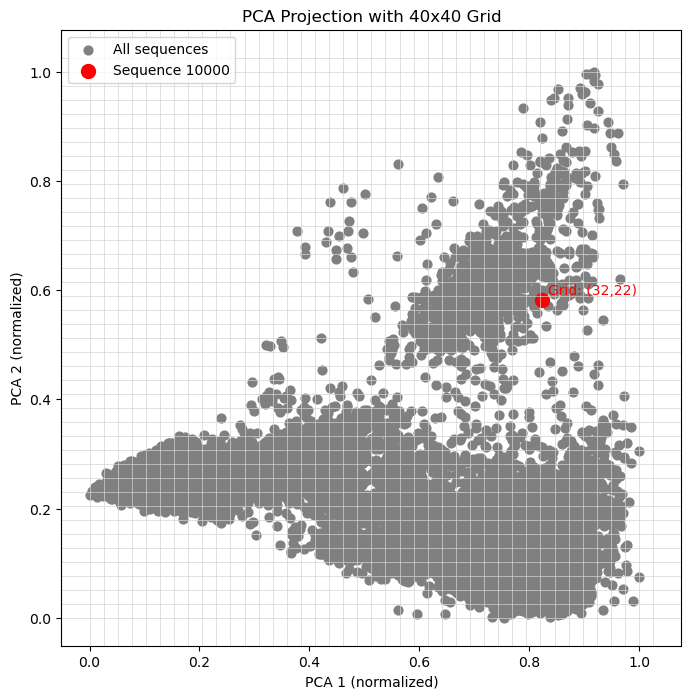

(14502, 65)


In [2]:
seqs_PCA_array = add_PCA_coords(seqs_array, N=40,max_pot=21,plot=True, highlight_index=10000)
# print coordinates for sequence highlight_index in seqs_PCA_array - stored in the last two columns
print(seqs_PCA_array.shape)
#print(seqs_PCA_array[1000])
#print(seqs_PCA_array[1000, -2:])  # Print the last two columns (PCA coordinates)

In [3]:
print(seqs_PCA_array.shape)

(14502, 65)


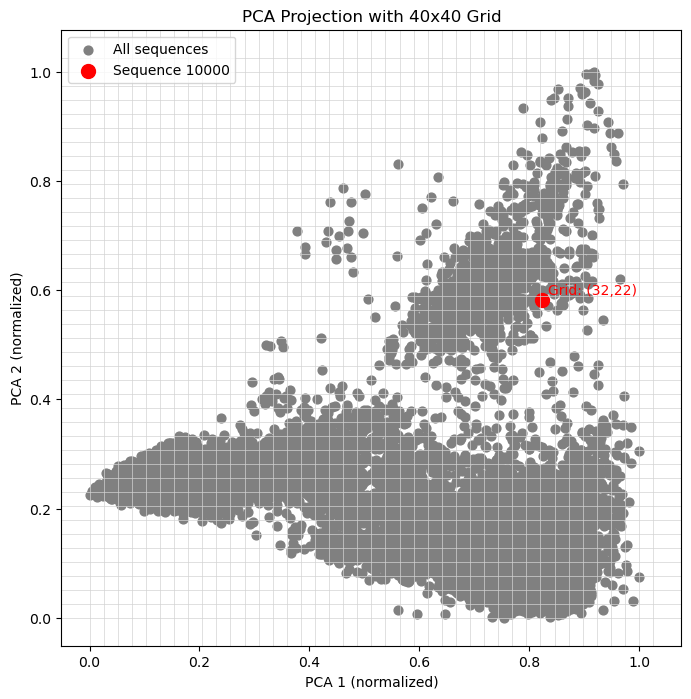

(14502, 64)


In [5]:
seqs_PCA_array = add_coords_flat(seqs_array, N=40,max_pot=21,plot=True, highlight_index=10000)
# print coordinates for sequence highlight_index in seqs_PCA_array - stored in the last two columns
print(seqs_PCA_array.shape)

In [18]:
def flatten(coords, nb_bins_PCA=35):
    """
    Flatten 2D coordinates into a single index (row-major order).
    """
    x, y = coords
    return y * nb_bins_PCA + x 

In [15]:
def flatten(coords, nb_bins_PCA=35):
    """
    Flatten 2D coordinates into a single index.
    
    Args:
        coords: tuple/list/array of (x, y) coordinates
        nb_bins_PCA: number of bins along one dimension (assumed square grid)
    
    Returns:
        int: flattened coordinate index
    """
    x, y = coords
    return x * nb_bins_PCA + y

In [19]:
import os
import numpy as np
import platform
import matplotlib.pyplot as plt
from utils import *

# Set working directory based on OS
if platform.system() == "Darwin":
    cwd = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/'
elif platform.system() == "Windows":
    cwd = 'C:\\Users\\otheruser\\Desktop\\EPFL\\Master\\StageLBS\\PCA_gen_AI\\'
else:
    cwd = '/home/otheruser/EPFL/Master/StageLBS/PCA_gen_AI/'

# Load sequences
filename = os.path.join(cwd, 'CODE', 'DataAttentionDCA', 'jdoms', 'jdoms_bacteria_train2.fasta')
sequences = read_fasta_alignment(filename, 0.9)
seqs_array = sequences.T  # shape: (num_seq, L)

print("Input sequence shape:", seqs_array.shape)

# Grid size
N = 35

# Step 1: PCA coords
pca_coords = get_sequences_pca_coords(seqs_array)

# Step 2: Grid coords
grid_coords = get_PCA_grid_coords(pca_coords, N)

# Step 3: Flatten coords
flat_manual = grid_coords[:, 1] * N + grid_coords[:, 0]  # y * N + x
flat_func = np.array([flatten((x, y), N) for x, y in grid_coords])  # test your flatten()

# Compare manual vs function
print("Manual == flatten() function:", np.array_equal(flat_manual, flat_func))

# Step 4: Compare with add_coords_flat
seqs_with_flat = add_coords_flat(seqs_array, N)
flat_from_function = seqs_with_flat[:, -1]
print("Manual == add_coords_flat():", np.array_equal(flat_manual, flat_from_function))

# Show example outputs
print("\nFirst 10 comparisons:")
for i in range(10):
    print(f"[{i}] Flatten: {flat_func[i]:4d} | Function: {flat_from_function[i]:4d} | Match: {flat_func[i] == flat_from_function[i]}")


Total sequences read: 14502
Sequences after filtering: 14502
Input sequence shape: (14502, 63)
Manual == flatten() function: True
Manual == add_coords_flat(): False

First 10 comparisons:
[0] Flatten:  192 | Function:  192 | Match: True
[1] Flatten:  318 | Function:  318 | Match: True
[2] Flatten:  830 | Function:  830 | Match: True
[3] Flatten:  283 | Function:  283 | Match: True
[4] Flatten:  283 | Function:  283 | Match: True
[5] Flatten:  247 | Function:  247 | Match: True
[6] Flatten:  248 | Function:  248 | Match: True
[7] Flatten:  196 | Function:  196 | Match: True
[8] Flatten:  284 | Function:  284 | Match: True
[9] Flatten:  317 | Function:  317 | Match: True
